<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_excel("/content/heart_disease.xlsx", sheet_name='Heart_disease')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [ ]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

In [ ]:
col = df.select_dtypes(include=['number'])
df1 = df.copy()

for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Mark outliers as NaN
    df1[i] = df[i].where((df[i] >= lower_bound) & (df[i] <= upper_bound))


In [ ]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.300000,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.000000,flat,fixed defect,0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,False,0.400000,flat,fixed defect,0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,False,0.000000,flat,fixed defect,0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,Male,asymptomatic,125.0,NaN,False,normal,120.0,False,1.500000,upsloping,reversable defect,4
904,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,True,3.000000,flat,reversable defect,4
905,56.0,Male,non-anginal,170.0,NaN,False,lv hypertrophy,123.0,True,2.500000,downsloping,normal,4
906,56.0,Male,non-anginal,144.0,208.0,True,st-t abnormality,105.0,TURE,0.891253,downsloping,fixed defect,4


In [ ]:
display(df1.isnull().sum())

,0
age,1
sex,0
cp,0
trestbps,22
chol,187
fbs,0
restecg,0
thalch,1
exang,0
oldpeak,16


In [ ]:
df1['trestbps']=df1['trestbps'].fillna(df1['trestbps'].mean())

In [ ]:
df1['chol']=df1['chol'].fillna(df1['chol'].mean())

In [ ]:
df1['oldpeak']=df1['oldpeak'].fillna(df1['oldpeak'].mean())

In [ ]:
df1['thalch']=df1['thalch'].fillna(df1['thalch'].mean())

In [ ]:
df1['thalch']=df1['thalch'].fillna(df1['thalch'].mean())

In [ ]:
df1['age']=df1['age'].fillna(df1['age'].mean())

In [ ]:
df1['sex']=df1['sex'].map({'Male':0, "Female":1})

In [ ]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,0,typical angina,145.0,233.000000,True,lv hypertrophy,150.0,False,2.300000,downsloping,fixed defect,0
1,41.0,0,atypical angina,135.0,203.000000,False,normal,132.0,False,0.000000,flat,fixed defect,0
2,57.0,0,asymptomatic,140.0,192.000000,False,normal,148.0,False,0.400000,flat,fixed defect,0
3,52.0,0,typical angina,118.0,186.000000,False,lv hypertrophy,190.0,False,0.000000,flat,fixed defect,0
4,57.0,0,asymptomatic,110.0,201.000000,False,normal,126.0,True,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,0,asymptomatic,125.0,243.814147,False,normal,120.0,False,1.500000,upsloping,reversable defect,4
904,62.0,0,asymptomatic,166.0,170.000000,False,st-t abnormality,120.0,True,3.000000,flat,reversable defect,4
905,56.0,0,non-anginal,170.0,243.814147,False,lv hypertrophy,123.0,True,2.500000,downsloping,normal,4
906,56.0,0,non-anginal,144.0,208.000000,True,st-t abnormality,105.0,TURE,0.891253,downsloping,fixed defect,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_encoded=df1.copy()

df_encoded['exang'] = df_encoded['exang'].replace({'TURE': True, 'FALSE': False})

col=['cp','fbs','restecg','exang','slope','thal']
for i in col:
  df_encoded[i]=le.fit_transform(df_encoded[i])

df_encoded

/tmp/ipython-input-19-4046779522.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['exang'] = df_encoded['exang'].replace({'TURE': True, 'FALSE': False})


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,0,3,145.0,233.000000,1,0,150.0,0,2.300000,0,0,0
1,41.0,0,1,135.0,203.000000,0,1,132.0,0,0.000000,1,0,0
2,57.0,0,0,140.0,192.000000,0,1,148.0,0,0.400000,1,0,0
3,52.0,0,3,118.0,186.000000,0,0,190.0,0,0.000000,1,0,0
4,57.0,0,0,110.0,201.000000,0,1,126.0,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,0,0,125.0,243.814147,0,1,120.0,0,1.500000,2,2,4
904,62.0,0,0,166.0,170.000000,0,2,120.0,1,3.000000,1,2,4
905,56.0,0,2,170.0,243.814147,0,0,123.0,1,2.500000,0,1,4
906,56.0,0,2,144.0,208.000000,1,2,105.0,1,0.891253,0,0,4


In [ ]:
corr=df_encoded.select_dtypes(include=['number']).corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,-0.053949,-0.067167,0.243043,0.060599,0.175905,-0.012230,-0.324439,0.190914,0.226418,-0.051199,0.058166,0.325177
sex,-0.053949,1.000000,0.125130,-0.015268,0.086374,-0.092167,-0.078158,0.177976,-0.187388,-0.117016,0.045065,-0.068439,-0.259605
cp,-0.067167,0.125130,1.000000,0.007414,-0.110149,-0.045228,-0.072048,0.246769,-0.343597,-0.166889,0.092177,-0.080093,-0.312848
trestbps,0.243043,-0.015268,0.007414,1.000000,0.118354,0.104737,0.043312,-0.103616,0.135872,0.152240,0.013247,0.074799,0.113606
chol,0.060599,0.086374,-0.110149,0.118354,1.000000,0.027079,-0.055817,-0.019286,0.109343,0.033613,0.015544,0.019890,0.067588
fbs,0.175905,-0.092167,-0.045228,0.104737,0.027079,1.000000,0.067320,-0.067308,0.027807,0.036275,-0.026636,-0.017255,0.156268
restecg,-0.012230,-0.078158,-0.072048,0.043312,-0.055817,0.067320,1.000000,-0.196025,0.085640,-0.027928,-0.084796,-0.112161,0.036508
thalch,-0.324439,0.177976,0.246769,-0.103616,-0.019286,-0.067308,-0.196025,1.000000,-0.353371,-0.141949,0.224342,0.005399,-0.321779
exang,0.190914,-0.187388,-0.343597,0.135872,0.109343,0.027807,0.085640,-0.353371,1.000000,0.372601,-0.161810,0.085812,0.359549
oldpeak,0.226418,-0.117016,-0.166889,0.152240,0.033613,0.036275,-0.027928,-0.141949,0.372601,1.000000,-0.143553,0.081659,0.370460


<Axes: >

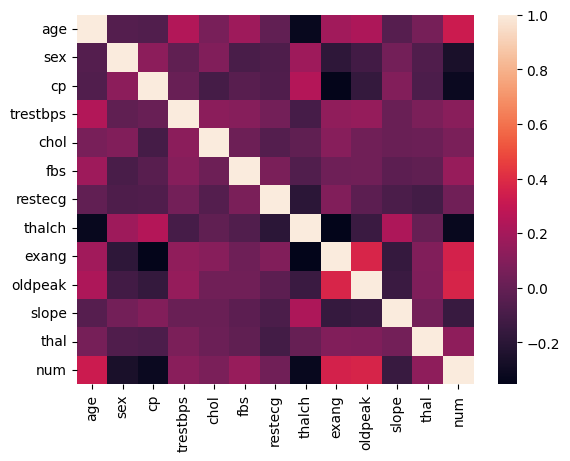

In [ ]:
import seaborn as sns
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop('num', axis=1)
Y=df_encoded['num']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


DecisionTreeClassifier()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

array([2, 0, 0, 2, 0, 3, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 3,
       0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0,
       3, 3, 0, 0, 0, 1, 2, 4, 0, 3, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       2, 1, 3, 1, 0, 3, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 3, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 2, 3, 0, 0, 0, 4, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       3, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 3, 0, 4, 0, 0, 0, 0, 0, 0, 3,
       0, 1, 0, 3, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy ", accuracy_score(Y_test, Y_pred))
print("Precision ", precision_score(Y_test, Y_pred, average='weighted'))
print("Recall ", recall_score(Y_test, Y_pred, average='weighted'))
print("F1 Score ", f1_score(Y_test, Y_pred, average='weighted'))

Accuracy  0.5
Precision  0.4745446510426987
Recall  0.5
F1 Score  0.48616125545597805


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # 'log_loss' works for multiclass (scikit-learn >=1.1)
    'splitter': ['best', 'random'],                # 'random' helps in some cases for generalization
    'max_depth': [3, 5, 7, 10, 15, None],          # Deeper trees capture more complexity
    'min_samples_split': [2, 5, 10, 20],           # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 10],          # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],        # Feature selection at each split
    'max_leaf_nodes': [None, 10, 20, 30, 50],      # Limit number of leaf nodes
    'min_weight_fraction_leaf': [0.0, 0.01, 0.05]  # Prevent very small leaf samples (in terms of weight)
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Tuned Model Accuracy:", accuracy_score(Y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.01, 'splitter': 'random'}
Tuned Model Accuracy: 0.554945054945055


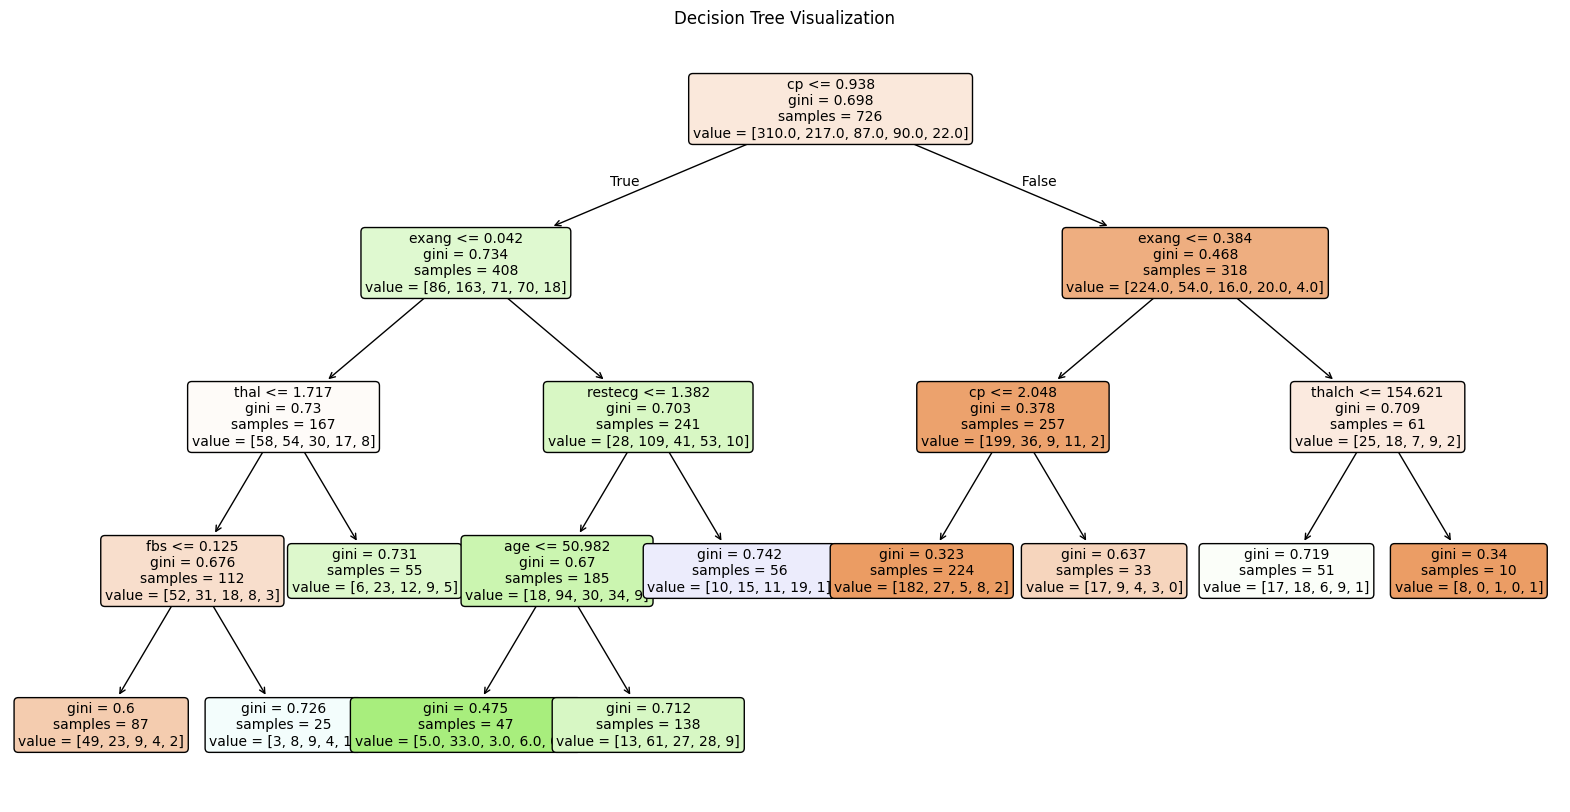

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?




max_depth	Limits tree depth → prevents overfitting if too large
min_samples_split	Minimum samples to split a node → higher = less complex
min_samples_leaf	Minimum samples at a leaf → higher = smoother predictions
criterion	Split quality (gini, entropy) → affects split decisions
max_features	Limits features per split → improves generalization
splitter	'best' vs 'random' → 'random' may reduce overfitting
max_leaf_nodes	Limits total leaf nodes → simpler tree structure
min_weight_fraction_leaf	Avoids tiny leaves → improves stability

What is the difference between the Label encoding and One-hot encoding?


label encoding: Converts each category into a unique number.

one hot encoding: Creates a new binary column for each category.